In [1]:
!pip install opencv-python mediapipe scikit-learn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable to save our memory -read only
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)

In [5]:
def draw_styled_landmarks(image, results): 
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    #draw face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

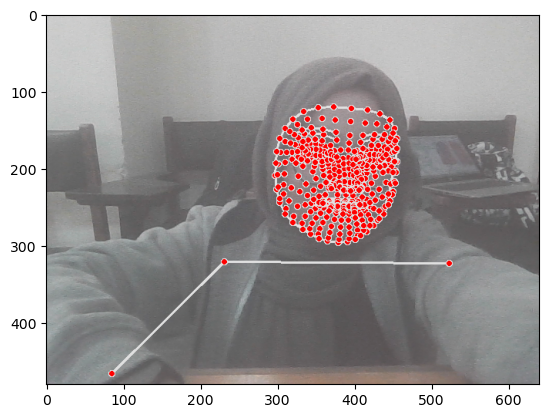

In [7]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [10]:
result_test = extract_keypoints(results)
result_test

array([ 0.59966266,  0.42969069, -1.79157412, ...,  0.        ,
        0.        ,  0.        ])

In [11]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.59966266,  0.42969069, -1.79157412, ...,  0.        ,
        0.        ,  0.        ])

In [12]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','thanks','play'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [13]:
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1,no_sequences+1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10)  == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [15]:
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'hello': 0, 'thanks': 1, 'play': 2}

In [18]:
sequences, labels = [], []     #two blank arrays for x and y data 
for action in actions:
    for sequence in range(1,no_sequences+1):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) #will load all the frames in a particular sequence
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(90, 30, 1662)

In [20]:
np.array(labels).shape

(90,)

In [21]:
X = np.array(sequences)


In [22]:
X.shape

(90, 30, 1662)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [26]:
X_train.shape

(85, 30, 1662)

In [27]:
X_test.shape

(5, 30, 1662)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000


3/3 [==============================] - 9s 183ms/step - loss: 2.5729 - categorical_accuracy: 0.2471
Epoch 2/1000
3/3 [==============================] - 1s 196ms/step - loss: 14.0662 - categorical_accuracy: 0.3647
Epoch 3/1000
3/3 [==============================] - 1s 185ms/step - loss: 10.2939 - categorical_accuracy: 0.3765
Epoch 4/1000
3/3 [==============================] - 0s 140ms/step - loss: 6.6536 - categorical_accuracy: 0.2588
Epoch 5/1000
3/3 [==============================] - 0s 165ms/step - loss: 2.2904 - categorical_accuracy: 0.3059
Epoch 6/1000
3/3 [==============================] - 0s 157ms/step - loss: 7.7543 - categorical_accuracy: 0.3412
Epoch 7/1000
3/3 [==============================] - 0s 119ms/step - loss: 9.3557 - categorical_accuracy: 0.3882
Epoch 8/1000
3/3 [==============================] - 1s 189ms/step - loss: 17.0467 - categorical_accuracy: 0.2706
Epoch 9/1000
3/3 [==============================] - 1s 202ms/step - loss: 11.5854 - categorical_acc

3/3 [==============================] - 1s 196ms/step - loss: 1.2783 - categorical_accuracy: 0.4824
Epoch 70/1000
3/3 [==============================] - 1s 186ms/step - loss: 1.2939 - categorical_accuracy: 0.4588
Epoch 71/1000
3/3 [==============================] - 1s 179ms/step - loss: 1.2199 - categorical_accuracy: 0.4353
Epoch 72/1000
3/3 [==============================] - 1s 180ms/step - loss: 0.9887 - categorical_accuracy: 0.5882
Epoch 73/1000
3/3 [==============================] - 1s 173ms/step - loss: 1.1699 - categorical_accuracy: 0.4706
Epoch 74/1000
3/3 [==============================] - 1s 182ms/step - loss: 1.5494 - categorical_accuracy: 0.5294
Epoch 75/1000
3/3 [==============================] - 1s 186ms/step - loss: 1.5521 - categorical_accuracy: 0.4235
Epoch 76/1000
3/3 [==============================] - 1s 183ms/step - loss: 2.4286 - categorical_accuracy: 0.4471
Epoch 77/1000
3/3 [==============================] - 1s 188ms/step - loss: 1.8913 - categorical_accuracy: 0.32

3/3 [==============================] - 1s 175ms/step - loss: 0.7681 - categorical_accuracy: 0.5412
Epoch 142/1000
3/3 [==============================] - 0s 141ms/step - loss: 0.9464 - categorical_accuracy: 0.5529
Epoch 143/1000
3/3 [==============================] - 1s 176ms/step - loss: 0.8577 - categorical_accuracy: 0.6000
Epoch 144/1000
3/3 [==============================] - 1s 161ms/step - loss: 1.0460 - categorical_accuracy: 0.5294
Epoch 145/1000
3/3 [==============================] - 0s 128ms/step - loss: 0.7225 - categorical_accuracy: 0.5176
Epoch 146/1000
3/3 [==============================] - 1s 205ms/step - loss: 0.8343 - categorical_accuracy: 0.6824
Epoch 147/1000
3/3 [==============================] - 1s 161ms/step - loss: 0.6493 - categorical_accuracy: 0.5529
Epoch 148/1000
3/3 [==============================] - 1s 201ms/step - loss: 0.5711 - categorical_accuracy: 0.7529
Epoch 149/1000
3/3 [==============================] - 1s 186ms/step - loss: 0.6341 - categorical_accura

Epoch 213/1000
3/3 [==============================] - 1s 195ms/step - loss: 0.4560 - categorical_accuracy: 0.7647
Epoch 214/1000
3/3 [==============================] - 1s 209ms/step - loss: 0.4198 - categorical_accuracy: 0.8353
Epoch 215/1000
3/3 [==============================] - 1s 211ms/step - loss: 0.3883 - categorical_accuracy: 0.8706
Epoch 216/1000
3/3 [==============================] - 1s 200ms/step - loss: 0.3959 - categorical_accuracy: 0.8824
Epoch 217/1000
3/3 [==============================] - 1s 205ms/step - loss: 0.3700 - categorical_accuracy: 0.8353
Epoch 218/1000
3/3 [==============================] - 1s 189ms/step - loss: 0.4187 - categorical_accuracy: 0.8588
Epoch 219/1000
3/3 [==============================] - 0s 163ms/step - loss: 0.3988 - categorical_accuracy: 0.8118
Epoch 220/1000
3/3 [==============================] - 1s 183ms/step - loss: 0.3821 - categorical_accuracy: 0.8588
Epoch 221/1000
3/3 [==============================] - 1s 203ms/step - loss: 0.3834 - cat

3/3 [==============================] - 1s 187ms/step - loss: 0.2096 - categorical_accuracy: 0.9647
Epoch 285/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.2044 - categorical_accuracy: 0.9647
Epoch 286/1000
3/3 [==============================] - 1s 216ms/step - loss: 0.2155 - categorical_accuracy: 0.9529
Epoch 287/1000
3/3 [==============================] - 1s 221ms/step - loss: 0.2747 - categorical_accuracy: 0.8941
Epoch 288/1000
3/3 [==============================] - 1s 220ms/step - loss: 0.2008 - categorical_accuracy: 0.9529
Epoch 289/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.2365 - categorical_accuracy: 0.9059
Epoch 290/1000
3/3 [==============================] - 1s 211ms/step - loss: 0.2313 - categorical_accuracy: 0.9176
Epoch 291/1000
3/3 [==============================] - 1s 187ms/step - loss: 0.1658 - categorical_accuracy: 0.9647
Epoch 292/1000
3/3 [==============================] - 0s 166ms/step - loss: 0.2025 - categorical_accura

Epoch 356/1000
3/3 [==============================] - 1s 204ms/step - loss: 0.0878 - categorical_accuracy: 1.0000
Epoch 357/1000
3/3 [==============================] - 1s 188ms/step - loss: 0.0813 - categorical_accuracy: 1.0000
Epoch 358/1000
3/3 [==============================] - 1s 203ms/step - loss: 0.0941 - categorical_accuracy: 1.0000
Epoch 359/1000
3/3 [==============================] - 1s 196ms/step - loss: 0.0874 - categorical_accuracy: 0.9882
Epoch 360/1000
3/3 [==============================] - 1s 189ms/step - loss: 0.0855 - categorical_accuracy: 1.0000
Epoch 361/1000
3/3 [==============================] - 1s 188ms/step - loss: 0.0926 - categorical_accuracy: 1.0000
Epoch 362/1000
3/3 [==============================] - 1s 190ms/step - loss: 0.0854 - categorical_accuracy: 1.0000
Epoch 363/1000
3/3 [==============================] - 0s 162ms/step - loss: 0.0869 - categorical_accuracy: 0.9765
Epoch 364/1000
3/3 [==============================] - 1s 214ms/step - loss: 0.0865 - cat

3/3 [==============================] - 1s 204ms/step - loss: 0.0414 - categorical_accuracy: 1.0000
Epoch 428/1000
3/3 [==============================] - 1s 204ms/step - loss: 0.0452 - categorical_accuracy: 1.0000
Epoch 429/1000
3/3 [==============================] - 1s 187ms/step - loss: 0.0426 - categorical_accuracy: 1.0000
Epoch 430/1000
3/3 [==============================] - 1s 186ms/step - loss: 0.0418 - categorical_accuracy: 1.0000
Epoch 431/1000
3/3 [==============================] - 1s 195ms/step - loss: 0.0397 - categorical_accuracy: 1.0000
Epoch 432/1000
3/3 [==============================] - 0s 141ms/step - loss: 0.0402 - categorical_accuracy: 1.0000
Epoch 433/1000
3/3 [==============================] - 1s 196ms/step - loss: 0.0433 - categorical_accuracy: 1.0000
Epoch 434/1000
3/3 [==============================] - 1s 198ms/step - loss: 0.0378 - categorical_accuracy: 1.0000
Epoch 435/1000
3/3 [==============================] - 1s 207ms/step - loss: 0.0394 - categorical_accura

Epoch 499/1000
3/3 [==============================] - 1s 214ms/step - loss: 0.0217 - categorical_accuracy: 1.0000
Epoch 500/1000
3/3 [==============================] - 1s 215ms/step - loss: 0.0210 - categorical_accuracy: 1.0000
Epoch 501/1000
3/3 [==============================] - 1s 221ms/step - loss: 0.0215 - categorical_accuracy: 1.0000
Epoch 502/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.0204 - categorical_accuracy: 1.0000
Epoch 503/1000
3/3 [==============================] - 1s 211ms/step - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 504/1000
3/3 [==============================] - 1s 212ms/step - loss: 0.0211 - categorical_accuracy: 1.0000
Epoch 505/1000
3/3 [==============================] - 1s 203ms/step - loss: 0.0222 - categorical_accuracy: 1.0000
Epoch 506/1000
3/3 [==============================] - 1s 197ms/step - loss: 0.0198 - categorical_accuracy: 1.0000
Epoch 507/1000
3/3 [==============================] - 1s 199ms/step - loss: 0.0217 - cat

3/3 [==============================] - 1s 202ms/step - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 571/1000
3/3 [==============================] - 1s 206ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 572/1000
3/3 [==============================] - 1s 186ms/step - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 1s 205ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 1s 217ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.0134 - categorical_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 1s 189ms/step - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 578/1000
3/3 [==============================] - 1s 191ms/step - loss: 0.0129 - categorical_accura

Epoch 642/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 643/1000
3/3 [==============================] - 1s 192ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 644/1000
3/3 [==============================] - 1s 183ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 645/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 646/1000
3/3 [==============================] - 1s 175ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 647/1000
3/3 [==============================] - 1s 210ms/step - loss: 0.0085 - categorical_accuracy: 1.0000
Epoch 648/1000
3/3 [==============================] - 1s 202ms/step - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 649/1000
3/3 [==============================] - 1s 174ms/step - loss: 0.0085 - categorical_accuracy: 1.0000
Epoch 650/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0086 - cat

3/3 [==============================] - 1s 184ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 714/1000
3/3 [==============================] - 1s 173ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 715/1000
3/3 [==============================] - 1s 182ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 716/1000
3/3 [==============================] - 1s 183ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 717/1000
3/3 [==============================] - 1s 189ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 718/1000
3/3 [==============================] - 1s 194ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 719/1000
3/3 [==============================] - 1s 208ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 720/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 721/1000
3/3 [==============================] - 1s 190ms/step - loss: 0.0062 - categorical_accura

Epoch 785/1000
3/3 [==============================] - 1s 202ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 786/1000
3/3 [==============================] - 1s 207ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 787/1000
3/3 [==============================] - 1s 202ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 788/1000
3/3 [==============================] - 1s 178ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 789/1000
3/3 [==============================] - 1s 194ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 790/1000
3/3 [==============================] - 1s 192ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 791/1000
3/3 [==============================] - 1s 192ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 792/1000
3/3 [==============================] - 1s 216ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 793/1000
3/3 [==============================] - 1s 201ms/step - loss: 0.0046 - cat

3/3 [==============================] - 1s 183ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 857/1000
3/3 [==============================] - 1s 194ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 858/1000
3/3 [==============================] - 1s 196ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 859/1000
3/3 [==============================] - 1s 185ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 860/1000
3/3 [==============================] - 1s 191ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 1s 212ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 1s 195ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 1s 193ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 864/1000
3/3 [==============================] - 1s 197ms/step - loss: 0.0034 - categorical_accura

Epoch 928/1000
3/3 [==============================] - 1s 211ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 929/1000
3/3 [==============================] - 1s 203ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 930/1000
3/3 [==============================] - 1s 192ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 931/1000
3/3 [==============================] - 1s 184ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 932/1000
3/3 [==============================] - 1s 190ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 933/1000
3/3 [==============================] - 1s 211ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 934/1000
3/3 [==============================] - 1s 190ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 935/1000
3/3 [==============================] - 1s 192ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 936/1000
3/3 [==============================] - 1s 193ms/step - loss: 0.0027 - cat

3/3 [==============================] - 1s 183ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1000/1000
3/3 [==============================] - 1s 202ms/step - loss: 0.0022 - categorical_accuracy: 1.0000


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [34]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [35]:
actions[np.argmax(res[1])]

'play'

In [36]:
actions[np.argmax(y_test[1])]

'thanks'

In [37]:
model.save('action.h5')

C:\Users\Public\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [39]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [2, 1]],

       [[2, 2],
        [0, 1]]], dtype=int64)

In [42]:
accuracy_score(ytrue, yhat)

0.6

In [43]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [44]:
from tkinter import*
from tkinter import messagebox
from tkinter import ttk



In [45]:
def start():
    
    
    # 1. New detection variables
    sequence = []
    sentence = []
    predictions = []
    threshold = 0.5

    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        while cap.isOpened():
            ret, frame = cap.read()

        # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)
        
        # Draw landmarks
            draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]
        
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
            
            
        #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 

                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

            # Viz probabilities
                image = prob_viz(res, actions, image, colors)
            
                cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
                cv2.imshow('OpenCV Feed', image)

        # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                       break
cap.release()
cv2.destroyAllWindows()

    

In [47]:

m=Toplevel()
m.title("Language Detection")
m.geometry("700x400")
f1=Frame(m,bd=5,bg='orange')
f1.place(x=1,y=102,width=1400,height=900)
l1=Label(m,text='WELCOME TO SIGN LANGUAGE DETECTOR',bg='brown',fg='pink',font=('Ariel',38),pady=20)
l1.pack(side=TOP,fill="x")
img=PhotoImage(file=r"C:\Users\Tesla Laptops\Downloads\jpg2png (2)\WhatsApp Image 2023-12-20 at 3.36.06 PM.png")

img2=img.subsample(3,3)
l2=Label(f1,image=img2).grid(row=0,column=0,padx=37,pady=20)
img=PhotoImage(file=r"C:\Users\Public\anaconda3\envs\hello-tf\WhatsApp Image 2023-01-16 at 7.24.37 PM (1).png")

img4=img.subsample(3,3)
l3=Label(f1,image=img4).grid(row=0,column=1,padx=37,pady=20)
img=PhotoImage(file=r"C:\Users\Public\anaconda3\envs\hello-tf\WhatsApp Image 2023-01-16 at 7.24.38 PM.png")

img6=img.subsample(3,3)
l4=Label(f1,image=img6).grid(row=0,column=2,padx=37,pady=20)


b1=Button(f1,text="START",bg='brown',fg='white',command=start,width=13,font=('Ariel',20)).grid(row=2,column=1,pady=50,padx=32)
m.mainloop()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 68ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
hello
<class 'mediapipe.pyth